## Dogs vs cats

In [147]:
### Copying images to training, validation, and test directories

import os.path
from os import path
import shutil
import numpy as np
import os

import matplotlib.pyplot as plt

import tensorflow as tf

from keras import models, layers, optimizers
from keras.models import load_model
from keras.layers import Input
import keras

In [79]:
print('keras version: ', keras.__version__)
print('tensorflow version: ', tf.__version__)

keras version:  3.0.5
tensorflow version:  2.16.1


In [80]:
original_dataset_dir = './train'
base_dir = './cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Save dogs images
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)

**Construindo a rede**

Já construímos uma pequena convnet para a base de dados MNIST no exemplo anterior, então você deve estar familiarizado com tais convnets. Reutilizaremos a mesma estrutura geral: a convnet será um empilhamento alternado de camadas `Conv2D` (com ativação `relu`) e `MaxPooling2D`.

Porém, como você está lidando com imagens maiores e um problema mais complexo, você fará sua rede maior, consequentemente: ela terá mais uma etapa `Conv2D + MaxPooling2D`.
Isso serve tanto para aumentar a capacidade da rede quanto para reduzir ainda mais o tamanho dos mapas de características para que não fiquem excessivamente grandes quando você atingir a camada `Flatten`.
Aqui, pelo fato de se começar com entradas de tamanho 150 × 150 (uma escolha um tanto arbitrária), termina-se com mapas de características de tamanho 7 × 7 imediatamente antes da camada `Flatten`.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import set_random_seed

In [4]:
### Instantiating a small convnet for dogs vs. cats classification
set_random_seed(0)
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))
print(model_1.summary())

c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
### Configuring the model for training
set_random_seed(0)
model_1.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

**Pré-processamento dos dados**

Como já sabemos, os dados devem ser formatados em tensores de ponto flutuante devidamente pré-processados antes de serem alimentados na rede. Atualmente, os dados estão armazenados em arquivos JPEG no disco, então as etapas para inseri-los na rede são aproximadamente as seguintes:

1. Ler os arquivos de imagem.
2. Decodificar o conteúdo JPEG para grades RGB de pixels.
3. Converter essas grades em tensores de ponto flutuante.
4. Reescalar os valores dos pixels (entre 0 e 255) para o intervalo [0, 1] (como sabemos, as redes neurais preferem lidar com valores de entrada pequenos).

Pode parecer um difícil, mas felizmente o Keras possui ferramentas para cuidar automaticamente dessas etapas. O Keras possui um módulo com ferramentas auxiliares de processamento de imagem, localizado em `keras.preprocessing.image`. Em particular, ele contém a classe `ImageDataGenerator`, que permite configurar rapidamente geradores em Python que podem transformar automaticamente arquivos de imagem no disco em lotes de tensores pré-processados. É isso que você usará aqui.

In [6]:
### Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
  batch_size=20, class_mode='binary', seed=0)
validation_generator = test_datagen.flow_from_directory(validation_dir,
  target_size=(150, 150), batch_size=20, class_mode='binary', seed=0)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Vamos dar uma olhada na saída de um desses geradores: ele produz lotes de imagens RGB de 150 × 150 (formato `(20, 150, 150, 3)`) e rótulos binários (formato `(20,)`). Há 20 amostras em cada lote (o tamanho do lote). Observe que o gerador produz esses lotes indefinidamente: ele faz um loop interminável sobre as imagens na pasta de destino. Por esse motivo, é preciso interromper o loop de iteração em algum momento:

In [7]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Vamos ajustar o modelo aos dados usando o gerador. Isso é feito usando o método `fit_generator`, o equivalente ao `fit` para geradores de dados. Ele espera como seu primeiro argumento um gerador Python que produzirá lotes de entradas e alvos indefinidamente. Como os dados estão sendo gerados indefinidamente, o modelo do Keras precisa saber quantas amostras extrair do gerador antes de declarar uma época concluída. Isso é feito pelo argumento `steps_per_epoch`: após extrair `steps_per_epoch` lotes do gerador, ou seja, após executar `steps_per_epoch` passos de descida de gradiente, o processo de ajuste passará para a próxima época. Neste caso, os lotes têm 20 amostras, então levará 100 lotes até atingir sua meta de 2.000 amostras.

Ao usar `fit_generator`, pode-se passar um argumento `validation_data`, da mesma forma que com o método `fit`. É importante observar que esse argumento pode ser um gerador de dados, mas também pode ser uma tupla de arrays Numpy. Se passarmos um gerador como `validation_data`, esse gerador deverá produzir lotes de dados de validação indefinidamente; portanto, também devemos especificar o argumento `validation_steps`, que informa ao processo quantos lotes extrair do gerador de validação para avaliação.

> If you create a dataset with image_dataset_from_directory, remove steps_per_epoch and validation_steps parameters from model.fit\
\
The reason is steps has been initiated when batch_size passed into image_dataset_from_directory, and you can trying get the steps number with len.  [Source](https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data)

In [10]:
### Fitting the model using a batch generator

set_random_seed(0)
history_1 = model_1.fit(train_generator, 
                        epochs=30, validation_data=validation_generator, batch_size=20)

model_1.save('./models/cats_and_dogs_small_1.keras')

Epoch 1/30


c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - acc: 0.4878 - loss: 0.6950 - val_acc: 0.5070 - val_loss: 0.6970
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.5768 - loss: 0.6820 - val_acc: 0.6040 - val_loss: 0.6628
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.5935 - loss: 0.6628 - val_acc: 0.6200 - val_loss: 0.6523
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.6381 - loss: 0.6323 - val_acc: 0.6210 - val_loss: 0.6396
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - acc: 0.6789 - loss: 0.5874 - val_acc: 0.6710 - val_loss: 0.6071
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.7198 - loss: 0.5487 - val_acc: 0.6610 - val_loss: 0.6160
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.7227 - loss: 0.5328 - val_acc: 0.6880 - val_loss: 0.5890
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.7453 - loss: 0.5138 - val_acc: 0.6760 - val_loss: 0.5985
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc:

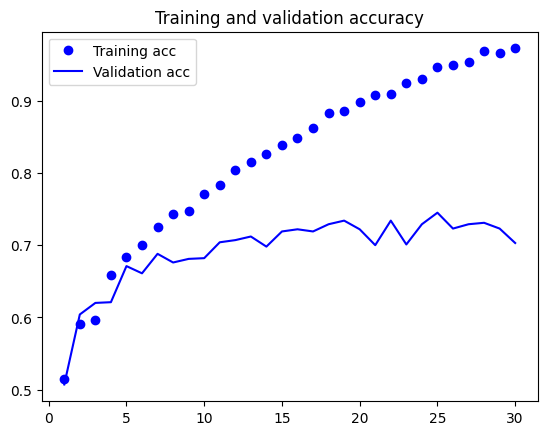

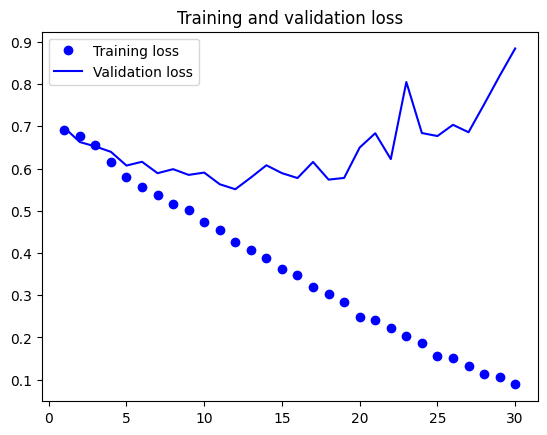

In [11]:
### Displaying curves of loss and accuracy during training


acc = history_1.history['acc']
val_acc = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Esses gráficos são característicos de *overfitting*. A precisão do treinamento aumenta linearmente ao longo do tempo, até atingir quase 100%, enquanto a precisão da validação estagna em 70–72%. A perda de validação atinge seu mínimo após apenas cinco épocas e depois estagna, enquanto a perda de treinamento continua diminuindo linearmente até atingir quase 0.

Como temos relativamente poucas amostras de treinamento (2.000), o *overfitting* será a nossa maior preocupação. Já conhecemos várias técnicas que podem ajudar a mitigar o *overfitting*, como dropout e regularização de pesos (regularização L2). Agora vamos trabalhar com uma nova técnica, específica para visão computacional e usada quase universalmente ao processar imagens com modelos de *deep learning*: **aumento de dados**.

**Usando aumento de dados**

O *overfitting* é causado por ter poucas amostras para aprender, tornando impossível treinar um modelo que possa generalizar para novos dados. Com dados infinitos, seu modelo seria exposto a todos os aspectos possíveis da distribuição de dados em questão: você nunca teria *overfitting*. O aumento de dados adota a abordagem de gerar mais dados de treinamento a partir das amostras de treinamento existentes, aplicando transformações aleatórias que produzem imagens realistas. O objetivo é garantir que, durante o treinamento, o modelo nunca veja a mesma imagem exata duas vezes. Isso ajuda a expor o modelo a mais aspectos dos dados e a generalizar melhor.

No Keras, isso pode ser feito configurando uma série de transformações aleatórias a serem realizadas nas imagens lidas pela instância do ImageDataGenerator. Vamos começar com um exemplo.

In [12]:
### Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

Aqui estão apenas algumas das opções disponíveis (para mais informações, consulte a documentação do Keras). Vamos dar uma olhada rápida neste código:

- `rotation_range` é um valor em graus (0–180), um intervalo no qual girar aleatoriamente as imagens.
- `width_shift` e `height_shift` são intervalos (como frações da largura ou altura total) nos quais transladar aleatoriamente as imagens vertical ou horizontalmente.
- `shear_range` serve para aplicar aleatoriamente transformações de cisalhamento.
- `zoom_range` serve para realizar zoom aleatório nas imagens.
- `horizontal_flip` serve para inverter aleatoriamente metade das imagens horizontalmente, sendo relevante quando não há suposições de assimetria horizontal (por exemplo, em imagens do mundo real).
- `fill_mode` é a estratégia usada para preencher pixels recém-criados, que podem aparecer após uma rotação ou um deslocamento de largura/altura.

Vamos dar uma olhada nas imagens aumentadas.

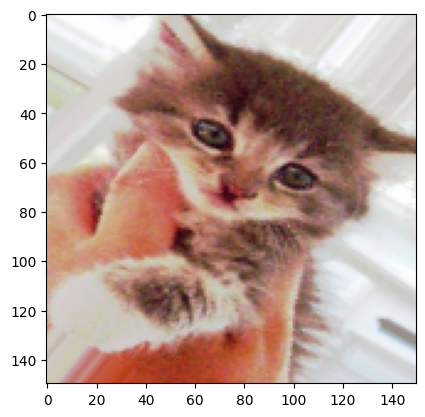

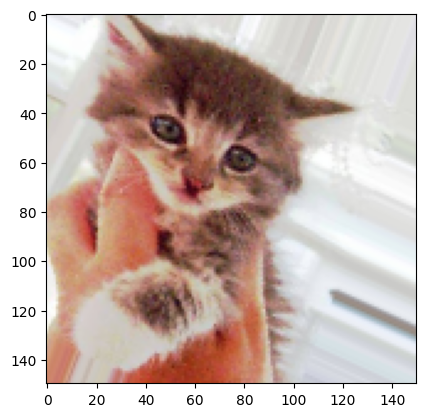

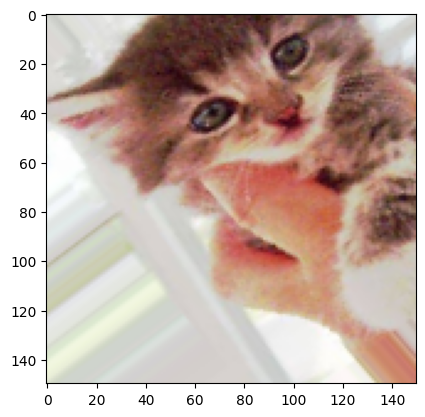

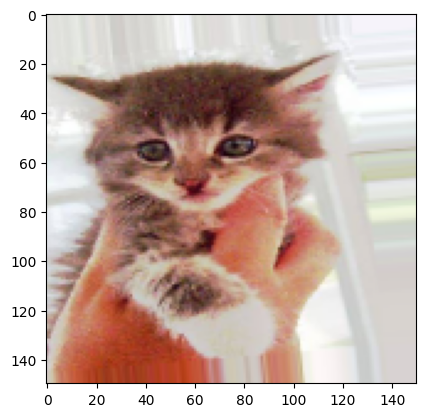

In [13]:
### Displaying some randomly augmented training images

from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

Se treinarmos uma nova rede usando essa configuração de aumento de dados, a rede nunca verá a mesma entrada duas vezes. No entanto, as entradas que ela vê ainda estão fortemente intercorrelacionadas, porque vêm de um pequeno número de imagens originais - as operações que fizemos não podem produzir novas informações, só podem remixar informações existentes. Como tal, isso pode não ser suficiente para eliminar completamente o *overfitting*. Para mitigar ainda mais o *overfitting*,  também adicionaremos uma camada de Dropout ao modelo, logo antes do classificador densamente conectado.

In [111]:
### Defining a new convnet that includes dropout
set_random_seed(0)

model_2 = models.Sequential()
model_2.add(layers.Input(shape=(150, 150, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [112]:
### Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary',
  seed=0)

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary',
  seed=0)

set_random_seed(0)

history_2 = model_2.fit(
  train_generator,
  epochs=100,
  validation_data=validation_generator)

model_2.save('./models/cats_and_dogs_small_2.keras')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.4976 - loss: 0.6955 - val_acc: 0.5000 - val_loss: 0.6991
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - acc: 0.5509 - loss: 0.6880 - val_acc: 0.5710 - val_loss: 0.6842
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - acc: 0.5553 - loss: 0.6830 - val_acc: 0.5790 - val_loss: 0.6711
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - acc: 0.5534 - loss: 0.6839 - val_acc: 0.5730 - val_loss: 0.6651
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - acc: 0.5615 - loss: 0.6761 - val_acc: 0.5730 - val_loss: 0.6659
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - acc: 0.5784 - loss: 0.6711 - val_acc: 0.5340 - val_loss: 0.7068
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - acc: 0.5955 - loss: 0.6597 - val_acc: 0.5210 - val_loss: 0.7181
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - acc: 0.5978 - loss: 0.6524 - val_acc: 0.6080 - val_loss: 0.6429
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━

**Exercício 1**

1. Plote os gráficos relativos à precisão e à perda de validação.

2. Compare os resultados com o modelo anterior.

In [16]:
def plot_train_val_charts(history1, history2, model_1_label='1', model_2_label='2', save_path='', color_1='b', color_2='r',
                          grid=False, xlim=None):
    """
    Compare two models training and validation loss and accuracy
    """
    metric = 'accuracy' if 'accuracy' in history1.history else 'acc'
    history_dict1 = history1.history
    history_dict2 = history2.history
    loss_values1 = history_dict1['loss']
    val_loss_values1 = history_dict1['val_loss']
    loss_values2 = history_dict2['loss']
    val_loss_values2 = history_dict2['val_loss']
    acc1 = history1.history[metric]
    acc2 = history2.history[metric]
    val_acc1 = history1.history[f'val_{metric}']
    val_acc2 = history2.history[f'val_{metric}']
    epochs1 = range(1, len(acc1) + 1)
    epochs2 = range(1, len(acc2) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs1, loss_values1, f'{color_1}o', label=f'Training loss Model {model_1_label}')
    plt.plot(epochs1, val_loss_values1, color_1, label=f'Validation loss Model {model_1_label}')
    plt.plot(epochs2, loss_values2, f'{color_2}o', label=f'Training loss Model {model_2_label}')
    plt.plot(epochs2, val_loss_values2, color_2, label=f'Validation loss Model {model_2_label}')
    plt.xticks(epochs1 if len(epochs1) > len(epochs2) else epochs2)
    plt.title(f'Training and validation loss Model {model_1_label} vs Model {model_2_label}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(grid)
    plt.xlim(xlim)

    plt.subplot(1, 2, 2)
    plt.plot(epochs1, acc1, f'{color_1}o', label=f'Training acc Model {model_1_label}')
    plt.plot(epochs1, val_acc1, color_1, label=f'Validation acc Model {model_1_label}')
    plt.plot(epochs2, acc2, f'{color_2}o', label=f'Training acc Model {model_2_label}')
    plt.plot(epochs2, val_acc2, color_2, label=f'Validation acc Model {model_2_label}')
    plt.xticks(epochs1 if len(epochs1) > len(epochs2) else epochs2)
    plt.title(f'Training and validation accuracy Model {model_1_label} vs Model {model_2_label}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(grid)
    plt.xlim(xlim)

    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path)
    # plt.show()

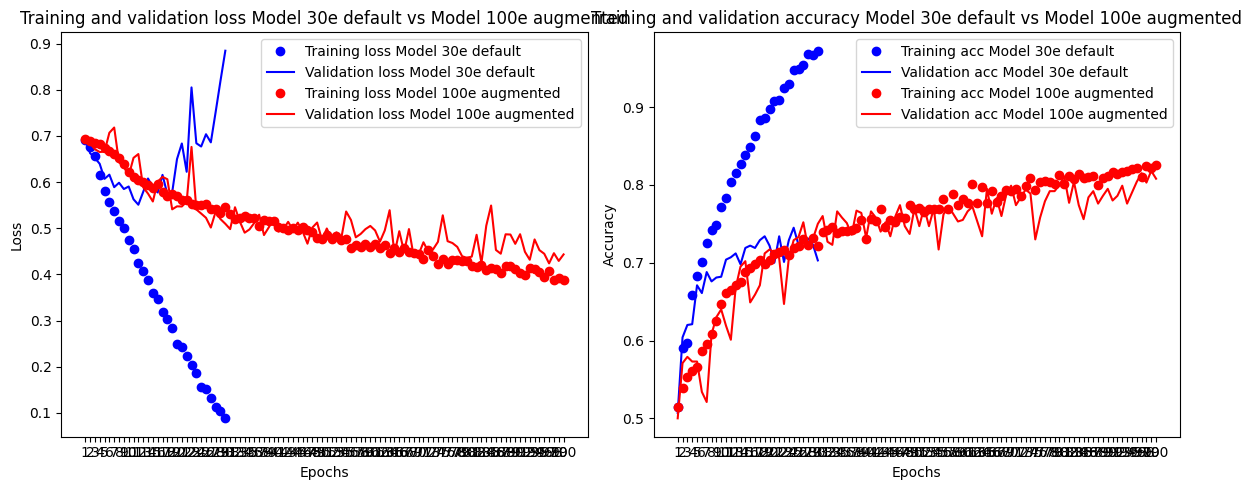

In [115]:
# Plotting precision and loss
plot_train_val_charts(history_1, history_2, model_1_label='30e default', model_2_label='100e augmented',
                      save_path='./charts/cats_and_dogs_small_default_vs_augmented.png')

In [18]:
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=0)

Found 1000 images belonging to 2 classes.


In [116]:
model_1.evaluate(test_set)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.7301 - loss: 0.8262


[0.8341427445411682, 0.7289999723434448]

In [117]:
model_2.evaluate(test_set)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8101 - loss: 0.4597


[0.45425987243652344, 0.8009999990463257]

### Análise

O modelo com aumento de dados e mais épocas de treinamento apresentou uma melhora significativa em relação ao modelo anterior. A precisão de validação atingiu 80%, um aumento de 8% em relação ao modelo anterior. Ele também apresentou uma perda de validação mais estável ao longo das épocas.

Se utilizarmos técnicas de regularização de maneira mais intensiva e ajustarmos os parâmetros da rede (como o número de filtros por camada de convolução ou o número de camadas na rede), podemos obter uma precisão ainda melhor, provavelmente até 86% ou 87%. No entanto, pode ser difícil alcançar uma precisão significativamente maior apenas treinando sua própria convnet do zero, devido à quantidade limitada de dados.
Como próximo passo para melhorar a precisão nesse problema, será necessário usar um modelo pré-treinado, que é o nosso foco a seguir. Antes disso:

**Exercício 2**
1. Utilize técnicas de regularização e ajuste os parâmetros da rede de modo a se aproximar de uma precisão de 86%.

In [21]:
# Add regularization and hiperparameter tuning to model 2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

set_random_seed(0)

model_2_ft = models.Sequential()
model_2_ft.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model_2_ft.add(layers.MaxPooling2D((2, 2)))
model_2_ft.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model_2_ft.add(layers.MaxPooling2D((2, 2)))
model_2_ft.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model_2_ft.add(layers.MaxPooling2D((2, 2)))
model_2_ft.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model_2_ft.add(layers.MaxPooling2D((2, 2)))
model_2_ft.add(layers.Flatten())
model_2_ft.add(layers.Dropout(0.5))
model_2_ft.add(layers.Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model_2_ft.add(layers.Dense(1, activation='sigmoid'))

model_2_ft.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('./models/cats_and_dogs_small_2_ft.keras', save_best_only=True)

In [ ]:
model_2_ft.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping,model_checkpoint])

**Usando uma convnet pré-treinada**

Uma abordagem comum e altamente eficaz para aprendizado profundo em conjuntos de dados pequenos de imagens é usar uma rede pré-treinada. Uma rede pré-treinada é uma rede salva que foi treinada anteriormente em um grande conjunto de dados, geralmente em uma tarefa de classificação de imagens em grande escala. Se este conjunto de dados original for grande e abrangente o suficiente, a hierarquia espacial de características aprendidas pela rede pré-treinada pode agir efetivamente como um modelo genérico do mundo visual. Portanto, suas características podem ser úteis para muitos problemas diferentes de visão computacional, mesmo que esses novos problemas envolvam classes completamente diferentes em relação à tarefa original. Por exemplo, você pode treinar uma rede no ImageNet (onde as classes são principalmente animais e objetos do dia a dia) e depois reutilizar essa rede treinada para algo tão distante quanto identificar itens de mobília em imagens. Essa portabilidade de características aprendidas entre diferentes problemas é uma vantagem fundamental da aprendizagem profunda em comparação com muitas abordagens mais antigas e rasas, tornando a aprendizagem profunda muito eficaz para problemas de dados pequenos.

Neste caso, consideremos uma convnet grande treinada no conjunto de dados ImageNet (1.4 milhão de imagens rotuladas e 1000 classes diferentes). O ImageNet contém muitas classes de animais, incluindo diferentes espécies de gatos e cachorros, e, portanto, você pode esperar um bom desempenho no problema de classificação entre cães e gatos.

Usaremos a arquitetura VGG16, desenvolvida por Karen Simonyan e Andrew Zisserman em 2014; é uma arquitetura de convnet simples e amplamente utilizada para o ImageNet. Embora seja um modelo mais antigo, longe do estado da arte atual e um pouco mais pesado do que muitos modelos mais recentes, sua arquitetura é semelhante ao que já estamos familiarizado e é fácil de entender sem introduzir novos conceitos.

Esta pode ser a sua primeira experiência com um desses nomes de modelos "simpáticos" - VGG, ResNet, Inception, Inception-ResNet, Xception, e assim por diante. Você se acostumará com eles, porque eles surgirão com frequência se continuar a trabalhar com aprendizagem profunda para visão computacional.

Existem duas maneiras de usar uma rede pré-treinada: extração de características (*feature extraction*) e ajuste fino (*fine-tuning*). Vamos abordar ambas abaixo.

**1. Feature extraction**

A extração de características consiste em usar as representações aprendidas por uma rede anterior para extrair características interessantes de novas amostras. Essas características são então passadas por um novo classificador, que é treinado do zero.

Como vimos anteriormente, convnets usadas para classificação de imagens são compostas por duas partes: começam com uma série de camadas de convolução e pooling e terminam com um classificador densamente conectado. A primeira parte é chamada de **base convolucional** do modelo. No caso das convnets, a extração de características consiste em pegar a base convolucional de uma rede previamente treinada, fazer passar os novos dados por ela e treinar um novo classificador com base na saída.

Por que reutilizar apenas a base convolucional? Será que também poderíamos reutilizar o classificador densamente conectado? Em geral, isso deve ser evitado. A razão é que as representações aprendidas pela base convolucional são mais propensas a serem genéricas e, portanto, mais reutilizáveis: os mapas de características de uma convnet são mapas de presença de conceitos genéricos em uma imagem, o que provavelmente será útil independentemente do problema de visão computacional em questão. No entanto, as representações aprendidas pelo classificador serão necessariamente específicas para o conjunto de classes no qual o modelo foi treinado - elas conterão apenas informações sobre a probabilidade de presença desta ou daquela classe em toda a imagem. Além disso, as representações encontradas em camadas densamente conectadas não contêm mais informações sobre onde os objetos estão localizados na imagem de entrada: essas camadas eliminam a noção de espaço, enquanto a localização do objeto ainda é descrita pelos mapas de características convolucionais. Para problemas em que a localização do objeto é importante, as características densamente conectadas são em grande parte inúteis.

Observe que o nível de generalidade (e, portanto, reusabilidade) das representações extraídas por camadas específicas de convolução depende da profundidade da camada no modelo. Camadas que estão no início do modelo extraem mapas de características locais e altamente genéricos (como bordas visuais, cores e texturas), enquanto camadas mais elevadas extraem conceitos mais abstratos (como "orelha de gato" ou "olho de cachorro"). Portanto, se seu novo conjunto de dados diferir muito do conjunto de dados no qual o modelo original foi treinado, pode ser mais vantajoso usar apenas as primeiras camadas do modelo para extração de características, em vez de usar a base de convolução inteira.

Neste caso, como o conjunto de classes do ImageNet contém várias classes de cães e gatos, é provável que seja benéfico reutilizar as informações contidas nas camadas densamente conectadas do modelo original. No entanto, optaremos por não fazer isso, a fim de abranger o caso mais geral em que o conjunto de classes do novo problema não se sobrepõe ao conjunto de classes do modelo original. Vamos colocar isso em prática usando a base convolucional da rede VGG16, treinada no ImageNet, para extrair características interessantes de imagens de gatos e cachorros, e depois treinar um classificador de cães versus gatos com base nessas características.

O modelo VGG16, entre outros, vem com o Keras. Podemos importá-lo do módulo `keras.applications`. Aqui está a lista de modelos de classificação de imagens (todos pré-treinados no conjunto de dados ImageNet) que estão disponíveis como parte do `keras.applications`:

- Xception
- Inception V3
- ResNet50
- VGG16
- VGG19
- MobileNet

Vamos instanciar o modelo VGG16.

In [24]:
### Instantiating the VGG16 convolutional base

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Você passa três argumentos para o construtor:
- `weights` especifica o *checkpoint* de pesos a partir do qual inicializar o modelo.
- `include_top` refere-se a incluir (ou não) o classificador densamente conectado no topo da rede. Por padrão, este classificador densamente conectado corresponde às 1.000 classes do ImageNet. Como você pretende usar seu próprio classificador densamente conectado (com apenas duas classes: gato e cachorro), não é necessário incluí-lo.
- `input_shape` é a forma dos tensores de imagem que você alimentará à rede. Este argumento é totalmente opcional: se você não o passar, a rede poderá processar entradas de qualquer tamanho.

Aqui está em detalhes a arquitetura da base convolucional do VGG16. É semelhante às convnets simples com as quais você já está familiarizado:

In [25]:
print(conv_base.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


O mapa de características final tem formato `(4, 4, 512)`. Essa é a característica no topo da qual você vai colocar um classificador densamente conectado.

Neste ponto, existem duas maneiras de prosseguir:
- Executar a base convolucional sobre seu conjunto de dados, gravando sua saída em uma matriz Numpy no disco, e depois usar esses dados como entrada para um classificador densamente conectado independente. Essa solução é rápida e econômica, porque requer apenas a execução da base convolucional uma vez para cada imagem de entrada, e a base convolucional é de longe a parte mais cara do *pipeline*. No entanto, por esse motivo, essa técnica não permitirá o uso de aumento de dados.

- Estender o modelo que você possui (conv_base) adicionando camadas Dense no topo e executando tudo de ponta a ponta nos dados de entrada. Isso permitirá o uso de aumento de dados, porque cada imagem de entrada passa pela base convolucional sempre que é vista pelo modelo. No entanto, por esse motivo, essa técnica é muito mais cara que a primeira.

Vamos abordar ambas as técnicas. Vamos passar pelo código necessário para configurar a primeira: gravar a saída de `conv_base` nos seus dados e usar essas saídas como entradas para um novo modelo.

**1.1 Rápida extração de características sem aumento de dados**

Começaremos executando instâncias do `ImageDataGenerator` anteriormente introduzido para extrair imagens como arrays Numpy, assim como seus rótulos. Extrairemos características dessas imagens chamando o método `predict` do modelo `conv_base`.



In [26]:
### Extracting features using the pretrained convolutional base

base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    seed=0)
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━

As características extraídas atualmente têm formato `(amostras, 4, 4, 512)`. Você as alimentará a um classificador densamente conectado, então primeiro você precisa achatá-las para `(amostras, 8192)`:

In [27]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Neste ponto, você pode definir seu classificador densamente conectado (observe o uso de *dropout* para regularização) e treiná-lo nos dados e rótulos que você acabou de gravar.

In [28]:
### Defining and training the densely connected classifier
set_random_seed(0)

model_3 = models.Sequential()
model_3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
  loss='binary_crossentropy',
  metrics=['acc'])

history_3 = model_3.fit(train_features, train_labels,
  epochs=30,
  batch_size=20,
  validation_data=(validation_features, validation_labels))

Epoch 1/30


c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6274 - loss: 0.6476 - val_acc: 0.8550 - val_loss: 0.4260
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8001 - loss: 0.4432 - val_acc: 0.8750 - val_loss: 0.3522
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8581 - loss: 0.3509 - val_acc: 0.8840 - val_loss: 0.3159
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8738 - loss: 0.3105 - val_acc: 0.8900 - val_loss: 0.2946
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8978 - loss: 0.2839 - val_acc: 0.8940 - val_loss: 0.2791
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9036 - loss: 0.2564 - val_acc: 0.8930 - val_loss: 0.2684
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9209 - loss: 0.2354 - val_acc: 0.8960 - val_loss: 0.2601
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9152 - loss: 0.2316 - val_acc: 0.8970 - val_loss: 0.2554
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9212 -

In [ ]:
model_3.save('./models/cats_and_dogs_small_3.keras')

**Exercício 3**

1. Plote os resultados e compare com os resultados dos modelos anteriores.

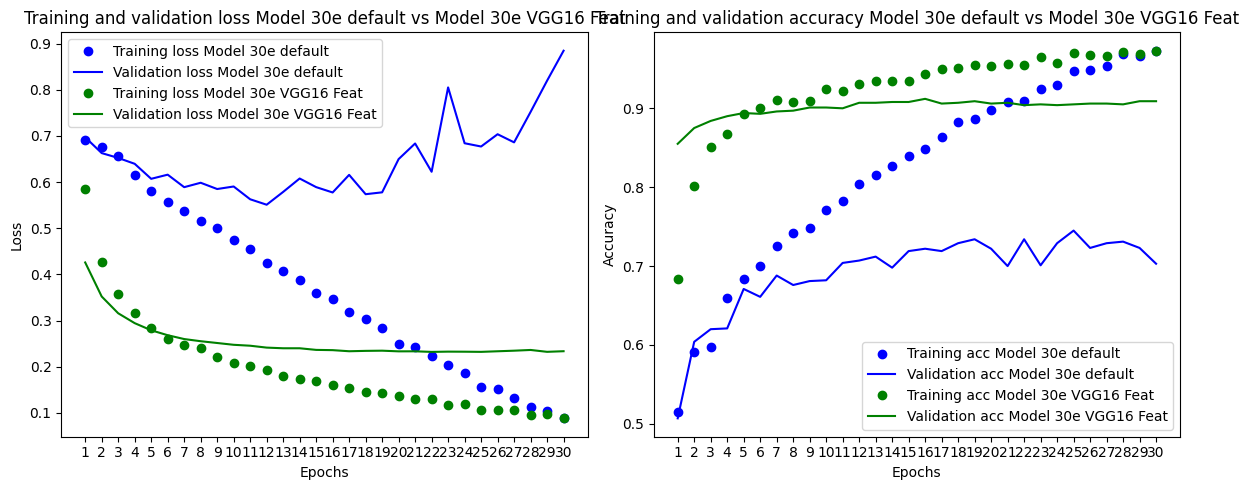

In [54]:
plot_train_val_charts(history_1, history_3, model_1_label='30e default', model_2_label='30e VGG16 Feat',color_2='g',
                      save_path='./charts/cats_and_dogs_small_default_vs_VGG16.png')

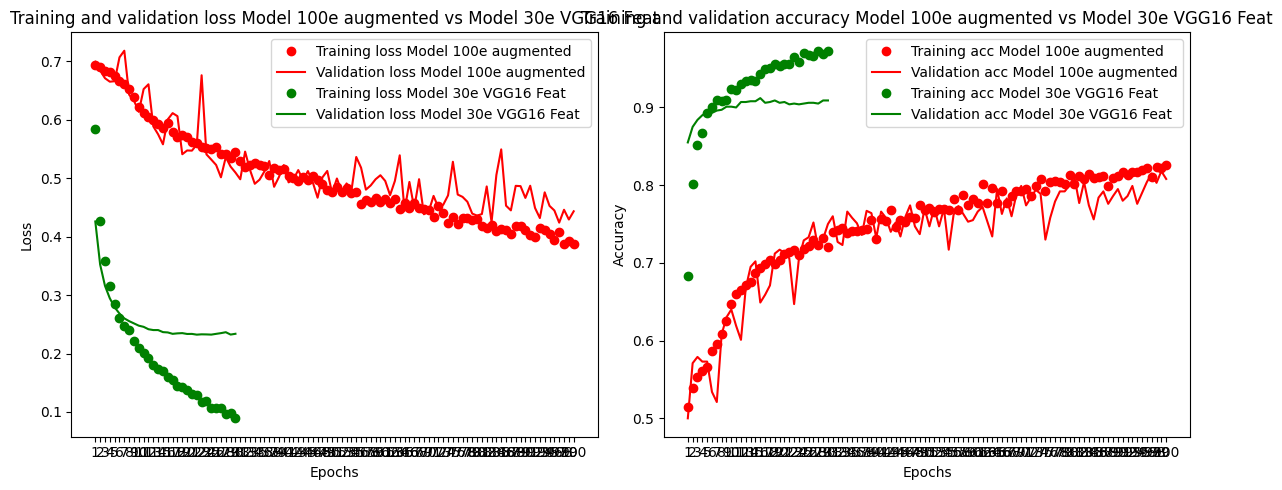

In [55]:
plot_train_val_charts(history_2, history_3, model_1_label='100e augmented', model_2_label='30e VGG16 Feat', color_1='r', color_2='g',
                      save_path='./charts/cats_and_dogs_small_augmented_vs_VGG16.png')

In [39]:
model_3.evaluate(test_features, test_labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8776 - loss: 0.2632 


[0.24932822585105896, 0.8889999985694885]

**1.2 Extração de características com aumento de dados**

Agora, vamos revisar a segunda técnica para fazer extração de características, que é muito mais lenta e cara, mas que permite o uso de aumento de dados durante o treinamento: estender o modelo `conv_base` e executá-lo de ponta a ponta nos inputs.

OBSERVAÇÃO IMPORTANTE: Pode ser que esta técnica não rode no Google Colab, devido às suas limitações. Caso isso ocorra, simplesmente leia a Seção. Normalmente, usaríamos uma GPU de última geração para usar essa técnica.

In [42]:
### Adding a densely connected classifier on top of the convolutional base
set_random_seed(0)

model_4 = models.Sequential()
model_4.add(conv_base)
model_4.add(layers.Flatten())
model_4.add(layers.Dense(256, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

print(model_4.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


Como podemos ver, a base convolucional do VGG16 tem 14714688 parâmetros, o que é uma quantidade muito grande. O classificador que estamos adicionando no topo tem 2 milhões de parâmetros.

Antes de compilar e treinar o modelo, é muito importante congelar a base convolucional. **Congelar** uma camada ou conjunto de camadas significa impedir que seus pesos sejam atualizados durante o treinamento. Se não fizermos isso, as representações que foram aprendidas anteriormente pela base convolucional serão modificadas durante o treinamento. Como as camadas `Dense` no topo são inicializadas aleatoriamente, atualizações de peso muito grandes seriam propagadas pela rede, destruindo  as representações aprendidas anteriormente.

No Keras, você congela uma rede definindo seu atributo `trainable` como `False`:





In [43]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model_4.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model_4.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Com essa configuração, apenas os pesos das duas camadas `Dense` que foram adicionadas serão treinados. Isso totaliza quatro tensores de peso: dois por camada (a matriz de pesos principal e o vetor de viés). Observe que, para que essas alterações tenham efeito, deve-se primeiro compilar o modelo. Se  a treinabilidade dos pesos é modificada após a compilação, deve-se recompilar o modelo, ou essas alterações serão ignoradas.

Agora podemos começar a treinar seu modelo, com a mesma configuração de aumento de dados que usamos no exemplo anterior.

In [46]:
### Listing 5.21 Training the model end to end with a frozen convolutional base

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary',
  seed=0)

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary',
  seed=0)

set_random_seed(0)

model_4.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate=2e-5),
  metrics=['acc'])

history_4 = model_4.fit(
  train_generator,
  epochs=30,
  validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 481ms/step - acc: 0.8013 - loss: 0.4584 - val_acc: 0.8490 - val_loss: 0.3561
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 493ms/step - acc: 0.8093 - loss: 0.4340 - val_acc: 0.8660 - val_loss: 0.3186
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 689ms/step - acc: 0.8203 - loss: 0.4129 - val_acc: 0.8790 - val_loss: 0.2986
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 487ms/step - acc: 0.8291 - loss: 0.4001 - val_acc: 0.8900 - val_loss: 0.2839
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - acc: 0.8276 - loss: 0.3640 - val_acc: 0.8930 - val_loss: 0.2741
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 484ms/step - acc: 0.8207 - loss: 0.3815 - val_acc: 0.8870 - val_loss: 0.2725
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 482ms/step - acc: 0.8582 - loss: 0.3316 - val_acc: 0.8940 - val_loss: 0.2638
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 483ms/step - acc: 0.8572 - loss: 0.3311 - val_acc: 0.8930 - val_loss: 0.2592
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s

In [52]:
model_4.save('./models/cats_and_dogs_small_4.keras')

**Exercício 4**

1. Plote os resultados e compare com os resultados dos modelos anteriores.

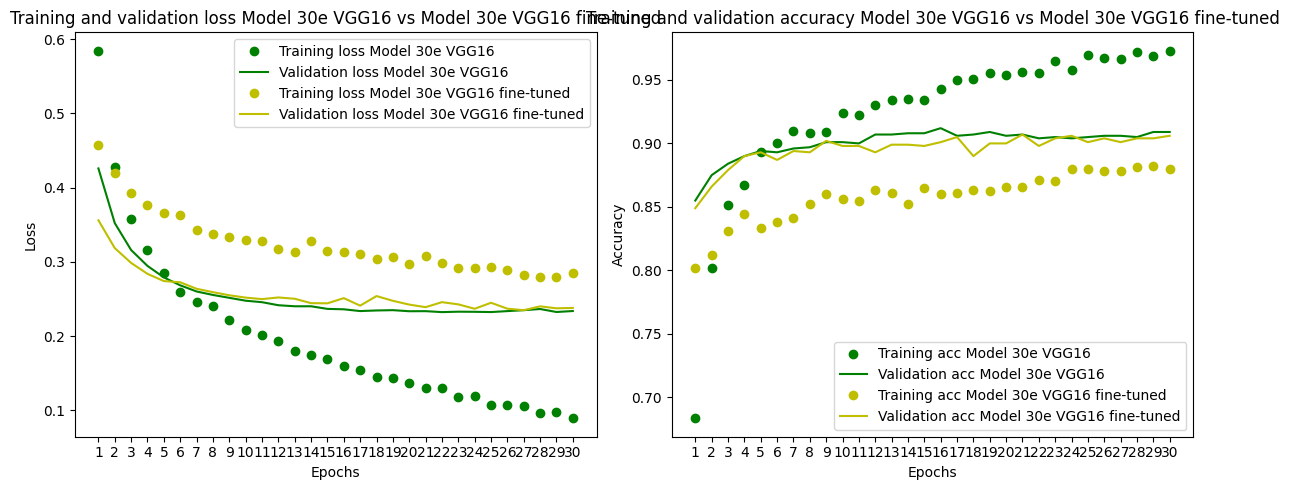

In [56]:
plot_train_val_charts(history_3, history_4, model_1_label='30e VGG16', model_2_label='30e VGG16 fine-tuned', color_1='g', color_2='y',
                      save_path='./charts/cats_and_dogs_small_VGG16_vs_fine_tuned.png')

In [53]:
model_4.evaluate(test_set)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 317ms/step - acc: 0.8904 - loss: 0.2464


[0.24991567432880402, 0.8939999938011169]

#### Análise

O modelo VGG16 com aumento de dados e ajuste fino obteve uma acurácia de teste maior que o modelo VGG16 sem aumento de dados, como o esperado, apesar dos gráficos de perda e acurácia de validação serem muito semelhantes. Provavelmente esse modelo ainda tem muita margem de melhora, já que tem muitos parâmetros e foi treinado por apenas 30 épocas.

Contudo, o tempo de treinamento entre os modelos é muito diferente. O modelo VGG16 com aumento de dados e ajuste fino é muito mais demorado a se treinar, já que estamos treinando a rede inteira, e não apenas o classificador. Isso é uma desvantagem, mas pode ser contornada com o uso de uma GPU mais potente.

| Modelo | Acurácia de validação | Acurácia de Teste | Tempo de treinamento |
|--------|------------------------|-------------------|----------------------|
| VGG16 Features + 30 Épocas Dense | 90.9% | 88,8% | 16 segundos |
| VGG16 Conv Base + 30 Épocas Dense | 90.6% | 89.3% | 25 minutos |

**2. Fine-tuning**

Outra técnica amplamente utilizada para reutilização de modelos, complementar à extração de características, é o **ajuste fino** (*fine-tuning*). O ajuste fino consiste em descongelar algumas das camadas superiores de uma base de modelo congelada usada para extração de características, e treinar em conjunto tanto a parte recém-adicionada do modelo (neste caso, o classificador totalmente conectado) quanto essas camadas superiores. Isso é chamado de ajuste fino porque ajusta levemente as representações mais abstratas do modelo sendo reutilizado, a fim de torná-las mais relevantes para o problema em questão.

Vimos anteriormente que é necessário congelar a base convolucional do VGG16 para poder treinar um classificador inicializado aleatoriamente no topo. Por esse mesmo motivo, só é possível ajustar finamente as camadas superiores da base convolucional depois que o classificador no topo já foi treinado. Se o classificador ainda não estiver treinado, então o sinal de erro propagado pela rede durante o treinamento será muito grande, e as representações anteriormente aprendidas pelas camadas sendo ajustadas finamente serão destruídas. Assim, as etapas para ajuste fino de uma rede são as seguintes:

1. Adicione sua rede personalizada no topo de uma base de rede já treinada.
2. Congele a base da rede.
3. Treine a parte que você adicionou.
4. Descongele algumas camadas na base da rede.
5. Treine em conjunto tanto essas camadas quanto a parte que você adicionou.

Já completamos as três primeiras etapas ao fazer a extração de características. Vamos prosseguir com a etapa 4: descongelaremos a `conv_base` e, em seguida, congelaremos camadas individuais dentro dela.
Como lembrete, é assim que é a nossa base convolucional:

In [57]:
print(conv_base.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Ajustaremos finamente as últimas três camadas convolucionais, o que significa que todas as camadas até `block4_pool` devem ser congeladas, e as camadas `block5_conv1`, `block5_conv2` e `block5_conv3` devem ser treináveis.
Por que não ajustar mais camadas? Por que não ajustar toda a base convolucional? Seria possível fazer isso. Mas é preciso considerar o seguinte:
- Camadas anteriores na base convolucional codificam características mais genéricas e reutilizáveis, enquanto camadas mais altas codificam características mais especializadas. É mais útil ajustar finamente as características mais especializadas, pois são essas que precisam ser reutilizadas no novo problema.
- Quanto mais parâmetros estivermos treinando, mais teremos risco de *overfitting*. A base convolucional possui 15 milhões de parâmetros, então seria arriscado tentar treiná-la para nosso pequeno conjunto de dados.

Assim, nesta situação, é uma boa estratégia ajustar finamente apenas as duas ou três camadas superiores na base convolucional. Vamos configurar isso, começando de onde paramos no exemplo anterior.

In [58]:
### Freezing all layers up to a specific one

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Agora podemos começar o ajuste fino da rede. Faremos isso com o otimizador RMSProp, usando uma taxa de aprendizado muito baixa. A razão para usar uma baixa taxa de aprendizado é que desejamos limitar a magnitude das modificações que são feitas nas representações das três camadas que estão sendo ajustadas finamente. Atualizações muito grandes podem prejudicar essas representações.

In [70]:
import copy

In [61]:
model_4.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate=1e-5),
  metrics=['acc'])

history_4ft = model_4.fit(
  train_generator,
  epochs=100,
  validation_data=validation_generator)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 537ms/step - acc: 0.8558 - loss: 0.3156 - val_acc: 0.9120 - val_loss: 0.2168
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 552ms/step - acc: 0.8969 - loss: 0.2537 - val_acc: 0.9150 - val_loss: 0.2078
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 562ms/step - acc: 0.8988 - loss: 0.2458 - val_acc: 0.9260 - val_loss: 0.1929
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 558ms/step - acc: 0.9083 - loss: 0.2258 - val_acc: 0.9260 - val_loss: 0.2018
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 553ms/step - acc: 0.9077 - loss: 0.2068 - val_acc: 0.9210 - val_loss: 0.1937
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 550ms/step - acc: 0.9197 - loss: 0.2022 - val_acc: 0.9260 - val_loss: 0.1988
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 561ms/step - acc: 0.9159 - loss: 0.2127 - val_acc: 0.9300 - val_loss: 0.1813
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 728ms/step - acc: 0.9363 - loss: 0.1549 - val_acc: 0.9170 - val_loss: 0.2103
Epoch 9/100
100/100 ━━━━

In [74]:
model_4.save('./models/cats_and_dogs_small_4ft.keras')

**Exercício 5**

1. Plote os resultados e compare com os resultados dos modelos anteriores. Se o gráfico estiver muito "quebrado", use a seguinte função para suavizá-lo:



In [62]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

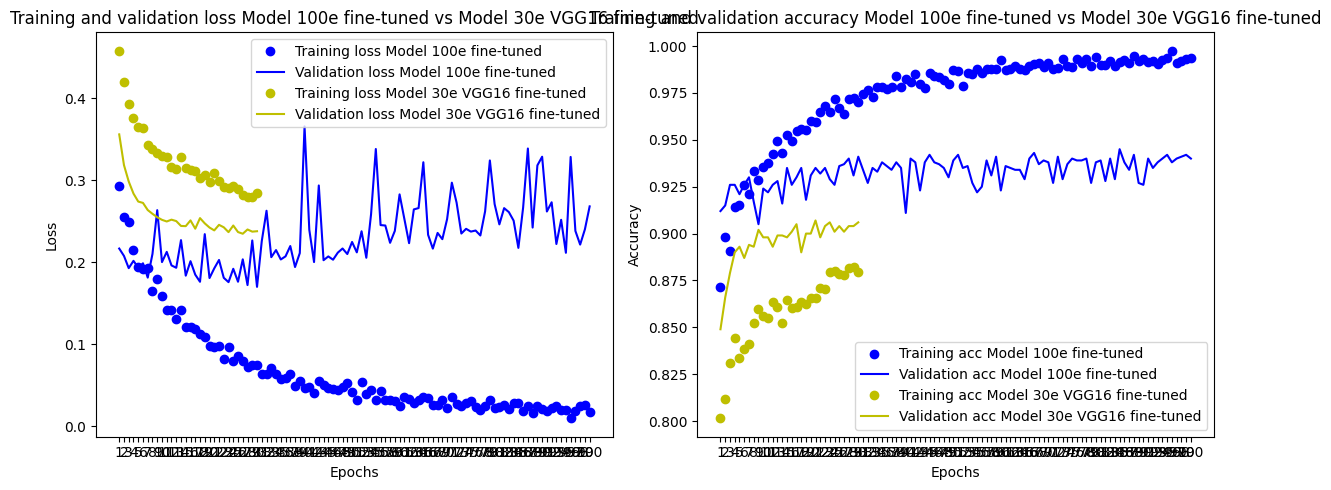

In [64]:
plot_train_val_charts(history_4ft, history_4, model_1_label='100e top layers fine-tuned', model_2_label='30e VGG16 fine-tuned', color_1='b', color_2='y',
                        save_path='./charts/cats_and_dogs_small_fine_tuned_vs_VGG16.png')

2. Avalie finalmente os modelos nos dados de teste.

In [65]:
model_4.evaluate(test_set)

50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 304ms/step - acc: 0.9522 - loss: 0.2166


[0.3293708860874176, 0.9409999847412109]

**Sumário**

- ConvNets são os melhores modelos de aprendizado de máquina para tarefas de visão computacional. É possível treinar um do zero, mesmo em um conjunto de dados muito pequeno, com resultados decentes.
- Em um conjunto de dados pequeno, o *overfitting* será o principal problema. Aumento de dados é uma maneira poderosa de combater o *overfitting* ao trabalhar com dados de imagem.
- É fácil reutilizar uma ConvNet existente em um novo conjunto de dados por meio da extração de características. Esta é uma técnica valiosa para lidar com conjuntos de dados pequenos de imagem.
- Como complemento à extração de características, pode-se usar o ajuste fino, que adapta a um novo problema algumas das representações aprendidas anteriormente por um modelo existente. Isso eleva o desempenho do modelo.

Agora temos um conjunto sólido de ferramentas para lidar com problemas de classificação de imagem, especialmente com conjuntos de dados pequenos.

**Visualizando ativações intermediárias**

A visualização de ativações intermediárias consiste em exibir os mapas de características que são gerados por várias camadas de convolução e *pooling* em uma rede, dado uma determinada entrada (a saída de uma camada é frequentemente chamada de **ativação**, que é a saída da função de ativação). Isso proporciona uma visão de como uma entrada é decomposta nos diferentes filtros aprendidos pela rede.

Queremos visualizar mapas de características com três dimensões: largura, altura e profundidade (canais). Cada canal codifica características relativamente independentes, então a maneira adequada de visualizar esses mapas de características é plotar independentemente o conteúdo de cada canal como uma imagem 2D.

Vamos começar carregando o modelo salvo anteriormente:

In [76]:
model_2 = load_model('./models/cats_and_dogs_small_2.keras')
print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,906,244 (26.35 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,453,123 (13.17 MB)

None


Em seguida, pegaremos uma imagem de entrada - uma foto de um gato, que não faz parte das imagens nas quais a rede foi treinada.

In [81]:
### Preprocessing a single image

img_path = './cats_and_dogs_small/test/cats/cat.1700.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


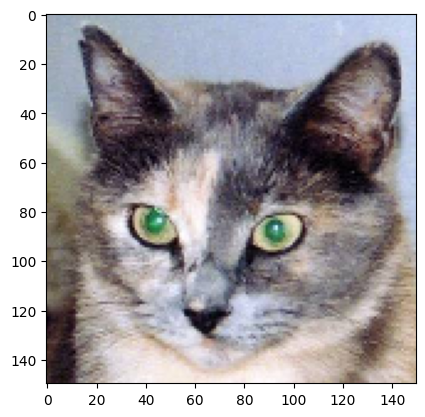

In [82]:
### Displaying the test picture

plt.imshow(img_tensor[0])
plt.show()

Para extrair os mapas de características que queremos visualizar, criaremos um modelo Keras que recebe lotes de imagens como entrada e gera as ativações de todas as camadas de convolução e *pooling*. Para fazer isso, usaremos a classe `Model` do Keras. Um modelo é instanciado usando dois argumentos: um tensor de entrada (ou lista de tensores de entrada) e um tensor de saída (ou lista de tensores de saída). A classe resultante é um modelo Keras, assim como os modelos `Sequential` com os quais estamos familiarizado, mapeando as entradas especificadas para as saídas especificadas. O que diferencia a classe `Model` é que ela permite modelos com múltiplas saídas, ao contrário do `Sequential`.

In [150]:
### Instantiating a model from an input tensor and a list of output tensors

#Extracting the outputs of the top eight layers
layer_outputs = [layer.output for layer in model_2.layers[:8]]

#Creating a model that will return these outputs, given the model input
activation_model = models.Model(inputs=Input(shape=model_2.input_shape[1:]), outputs=layer_outputs)

Quando alimentado com uma entrada de imagem, este modelo retorna os valores das ativações das camadas no modelo original. Esta é a primeira vez que encontramos um modelo com várias saídas: até agora, os modelos que vimos tinham exatamente uma entrada e uma saída. No caso geral, um modelo pode ter qualquer número de entradas e saídas. Este tem uma entrada e oito saídas: uma saída por ativação de camada.

In [ ]:
###   Running the model in predict mode

#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

#For instance, this is the activation of the first convolution layer for the cat image input
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
### Visualizing the fourth channel

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Esse canal parece codificar um detector de borda diagonal.

**Exercício 6**
1. Vizualize o sétimo e o décimo canal e tente descobrir que informação o canal parece estar codificando.

In [ ]:
### Visualizing every channel in every intermediate activation

#Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in model_2.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

#Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
  #Number of features in the feature map
  n_features = layer_activation.shape[-1]
  #The feature map has shape (1, size, size, n_features).
  size = layer_activation.shape[1]
  #Tiles the activation channels in this matrix
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  #Tiles each filter into a big horizontal grid
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :, col * images_per_row + row]
      #Post-processes the feature to make it visually palatable
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

Há algumas coisas a serem observadas aqui:
- A primeira camada atua como uma coleção de vários detectores de borda. Nessa fase, as ativações retêm quase todas as informações presentes na imagem inicial.
- À medida que subimos nas camadas, as ativações se tornam cada vez mais abstratas e menos visualmente interpretáveis. Elas começam a codificar conceitos de nível superior, como "orelha de gato" e "olho de gato". Apresentações mais altas contêm cada vez menos informações sobre o conteúdo visual da imagem e cada vez mais informações relacionadas à classe da imagem.
- A dispersão das ativações aumenta com a profundidade da camada: na primeira camada, todos os filtros são ativados pela imagem de entrada; mas nas camadas seguintes, cada vez mais filtros ficam em branco. Isso significa que o padrão codificado pelo filtro não é encontrado na imagem de entrada.

Acabamos de constatar uma característica universal importante das representações aprendidas por redes neurais profundas: as características extraídas por uma camada se tornam cada vez mais abstratas com a profundidade da camada. As ativações de camadas mais altas carregam menos informações sobre a entrada específica sendo vista e mais informações sobre o alvo (neste caso, a classe da imagem: gato ou cachorro). Uma rede neural profunda atua efetivamente como um **pipeline de destilação de informações**, com dados brutos entrando (neste caso, imagens RGB) e sendo transformados repetidamente para que informações irrelevantes sejam filtradas (por exemplo, a aparência visual específica da imagem), e informações úteis sejam ampliadas e refinadas (por exemplo, a classe da imagem).

Isso é análogo à maneira como humanos e animais percebem o mundo: depois de observar uma cena por alguns segundos, um humano pode lembrar quais objetos abstratos estavam presentes (bicicleta, árvore), mas não consegue lembrar da aparência específica desses objetos.

**Vizualizando filtros convnet**

Outra maneira fácil de inspecionar os filtros aprendidos por convnets é exibir o padrão visual ao qual cada filtro deve responder. Isso pode ser feito com ascensão de gradiente no espaço de entrada: aplicando *gradient descent* ao valor da imagem de entrada de uma convnet para maximizar a resposta de um filtro específico, começando de uma imagem de entrada em branco. A imagem de entrada resultante será aquela à qual o filtro escolhido responde maximamente.

O processo é simples: construiremos uma função perda que maximize o valor de um determinado filtro em uma camada de convolução específica, e então usaremos o gradiente descendente estocástico para ajustar os valores da imagem de entrada de forma a maximizar esse valor de ativação. Por exemplo, abaixo encontramos uma função de perda para a ativação do filtro 0 na camada `block3_conv1` da rede VGG16, pré-treinada no ImageNet:

In [ ]:
### Defining the loss tensor for filter visualization

from keras.applications import VGG16
from tensorflow.keras import backend as K

model_vgg16 = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model_vgg16.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

Para implementar o *gradient descent*, precisaremos do gradiente dessa perda em relação à entrada do modelo. Para fazer isso, usaremos a função `gradients` contida no módulo `backend` do Keras.

In [ ]:
### Obtaining the gradient of the loss with regard to the input

#The call to gradients returns a list of tensors (of size 1 in this case). Hence,
#you keep only the first element— which is a tensor.
grads = K.gradients(loss, model_vgg16.input)[0]

Um truque não óbvio que ajuda no processo de descida do gradiente é normalizar o tensor de gradiente dividindo-o pela sua norma L2 (a raiz quadrada da média dos quadrados dos valores no tensor). Isso garante que a magnitude das atualizações feitas na imagem de entrada esteja sempre dentro da mesma faixa.

In [ ]:
### Gradient-normalization trick

#Add 1e–5 before dividing to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

Agora precisamos de uma maneira de calcular o valor do tensor de perda e do tensor de gradiente, dado uma imagem de entrada. Podemos definir uma função de backend do Keras para fazer isso: `iterate` é uma função que recebe um tensor Numpy (como uma lista de tensores de tamanho 1) e retorna uma lista de dois tensores Numpy: o valor da perda e o valor do gradiente.

In [ ]:
### Fetching Numpy output values given Numpy input values

iterate = K.function([model_vgg16.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

Neste ponto, podemos definir um loop em Python para realizar a descida estocástica do gradiente.

In [ ]:
### Loss maximization via stochastic gradient descent

#Starts from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1. #Magnitude of each gradient update

#Runs gradient ascent for 40 steps
for i in range(40):
  #Computes the loss value and gradient value
  loss_value, grads_value = iterate([input_img_data])
  #Adjusts the input image in the direction that maximizes the loss
  input_img_data += grads_value * step


O tensor de imagem resultante é um tensor de ponto flutuante com formato (1, 150, 150, 3), com valores que podem não ser inteiros dentro do intervalo `[0, 255]`. Portanto, precisamos pós-processar esse tensor para transformá-lo em uma imagem exibível. Isso é feito com a seguinte função simples de utilidade.

In [ ]:
### Utility function to convert a tensor into a valid image

def deprocess_image(x):
  #Normalizes the tensor: centers on 0, ensures that std is 0.1
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  #Clips to [0, 1]
  x += 0.5
  x = np.clip(x, 0, 1)

  #Converts to an RGB array
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

Agora vamos criar uma função Python que recebe como entrada um nome de camada e um índice de filtro, e retorna um tensor de imagem válido representando o padrão que maximiza a ativação do filtro especificado.

In [ ]:
### Function to generate filter visualizations

def generate_pattern(layer_name, filter_index, size=150, model=model_vgg16):
  #Builds a loss function that maximizes the activation of
  #the nth filter of the layer under consideration
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  #Computes the gradient of the input picture with regard to this loss
  grads = K.gradients(loss, model.input)[0]

  #Normalization trick: normalizes the gradient
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  #Returns the loss and grads given the input picture
  iterate = K.function([model.input], [loss, grads])

  #Starts from a gray image with some noise
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

  #Runs gradient ascent for 40 steps
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

  img = input_img_data[0]
  return deprocess_image(img)

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))

Parece que o filtro 0 na camada `block3_conv1` responde a um padrão de *polka-dot* (bolinhas).

**Exercício 7**
1. Plote os padrões dos primeiros 64 filtros da primeira camada de cada bloco de convolução (`block1_conv1`, `block2_conv1`, `block3_conv1`, `block4_conv1`, `block5_conv1`). Organize as saídas em uma grade de 8 × 8 com padrões de filtro de 64 × 64, com algumas margens pretas entre cada padrão de filtro.

2. Discuta as informações codificadas, em geral, pelos padrões de cada camada.

**Visualizando mapas de calor de ativação de classe**

Vamos ver agora mais uma técnica de visualização, uma que é útil para entender quais partes de uma determinada imagem levaram uma convnet à sua decisão final de classificação. Isso é útil para depurar o processo de decisão de uma convnet, especialmente no caso de um erro de classificação. Também permite localizar objetos específicos em uma imagem.

Essa categoria geral de técnicas é chamada de **visualização de mapas de ativação de classe** (CAM - *class activation map*), e consiste na produção de mapas de calor de ativação de classe sobre imagens de entrada. Um mapa de calor de ativação de classe é uma grade 2D de pontuações associadas a uma classe específica de saída, calculada para cada localização em qualquer imagem de entrada, indicando quão importante é cada localização com respeito à classe em consideração. Por exemplo, ao fornecer uma imagem a uma convnet de gatos e cachorros, a visualização CAM permite gerar um mapa de calor para a classe "gato", indicando o quão parecidas diferentes partes da imagem são com gatos, e também um mapa de calor para a classe "cachorro", indicando o quão parecidas são as partes da imagem com cachorros.

A implementação específica vamos utilizar é a descrita em "Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization" (Ramprasaath R. Selvaraju et al., arXiv (2017), https://arxiv.org/abs/ 1610.02391). É muito simples: consiste em pegar o mapa de características de saída de uma camada de convolução, dado uma imagem de entrada, e ponderar cada canal nesse mapa de características pelo gradiente da classe em relação ao canal. De maneira intuitiva, uma forma de entender esse truque é que você está ponderando um mapa espacial de "quão intensamente a imagem de entrada ativa diferentes canais" pelo "quão importante cada canal é em relação à classe", resultando em um mapa espacial de "quão intensamente a imagem de entrada ativa a classe".

Vamos demonstrar essa técnica usando novamente a rede pré-treinada VGG16.




In [178]:
### Loading the VGG16 network with pretrained weights

from keras.applications.vgg16 import VGG16

#Note that we will  include the densely connected classifier
#on top; in all previous cases, we discarded it.
model = VGG16(weights='imagenet')

Considere a imagem de dois elefantes africanos mostrada na figura `creative_commons_elephant.jpg`, possivelmente uma mãe e seu filhote, passeando na savana. Vamos converter essa imagem em algo que o modelo VGG16 pode ler: o modelo foi treinado em imagens de tamanho 224 × 224, pré-processadas de acordo com algumas regras que estão embutidas na função de utilidade `keras.applications.vgg16.preprocess_input`. Portanto, precisaremos carregar a imagem, redimensioná-la para 224 × 224, convertê-la em um tensor Numpy de ponto flutuante 32 e aplicar essas regras de pré-processamento.



In [ ]:
### Preprocessing an input image for VGG16

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = './creative_commons_elephant.jpg'

#Python Imaging Library (PIL) image of size 224 × 224
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)     #float32 Numpy array of shape (224, 224, 3)
x = np.expand_dims(x, axis=0)   #Adds a dimension to transform the array into a batch of size (1, 224, 224, 3)
x = preprocess_input(x)         #Preprocesses the batch (this does channel-wise color normalization)

#We can now run the pretrained network on the image and decode its prediction
#vector back to a human-readable format
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

As três principais classes previstas para esta imagem são as seguintes:

- Elefante africano (com 92.5% de probabilidade)
- Tusker (com 7% de probabilidade)
- Elefante indiano (com 0.4% de probabilidade)

A rede reconheceu a imagem como contendo uma quantidade indeterminada de elefantes africanos. A entrada no vetor de previsão que foi maximamente ativada é aquela correspondente à classe "Elefante africano", no índice 386:

In [143]:
print(np.argmax(preds[0]))

386


Para visualizar quais partes da imagem são mais semelhantes a um elefante africano, vamos configurar o processo Grad-CAM.

In [ ]:
### Setting up the Grad-CAM algorithm

#“African elephant” entry in the prediction vector
african_elephant_output = model.output[:, 386]

#Output feature map of the block5_conv3 layer, the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

#Gradient of the “African elephant” class with regard to the output feature map of block5_conv3
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

#Vector of shape (512,), where each entry is the mean intensity of the gradient
# over a specific feature-map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

#Lets you access the values of the quantities you just defined: pooled_grads and the
# output feature map of block5_conv3, given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

#Values of these two quantities, as Numpy arrays, given the sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

#Multiplies each channel in the feature-map array by “how important this channel
#is” with regard to the “elephant” class
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

#The channel-wise mean of the resulting feature map is the heatmap of the class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

#For visualization purposes, you’ll also normalize the heatmap between 0 and 1
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

Finalmente, usaremos o OpenCV para gerar uma imagem que sobreponha a imagem original ao mapa de calor que acabamos de obter.

In [ ]:
### Superimposing the heatmap with the original picture

import cv2

#Uses cv2 to load the original image
img = cv2.imread(img_path)

#Resizes the heatmap to be the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

#Converts the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

#Applies the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img #0.4 here is a heatmap intensity factor.

#Saves the image to disk
cv2.imwrite('./elephant_cam.jpg', superimposed_img)


Essa técnica de visualização responde a duas perguntas importantes:

- Por que a rede neural achou que esta imagem continha um elefante africano?

- Onde está localizado o elefante africano na imagem?

Em particular, é interessante observar que as orelhas do filhote de elefante estão fortemente ativadas: provavelmente é assim que a rede consegue diferenciar elefantes africanos de indianos.

**Exercício 8**
1. Selecione uma imagem da Internet que contenha animais e repita o processo acima.
2. Discuta os resultados.